<a href="https://colab.research.google.com/github/ishanshah10/Concepts-and-Technologies-of-AI/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression


Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/AB_NYC_2019.csv")
print(df.head())
print(df.info())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

Data Preprocessing

In [ ]:
# Drop unnecessary columns
df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)

# Fill missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Encode categorical variables
le = LabelEncoder()

df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
df['room_type'] = le.fit_transform(df['room_type'])

print(df.isnull().sum())


host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


**Exploratory Data Analysis**
**bold text**

Price Distribution


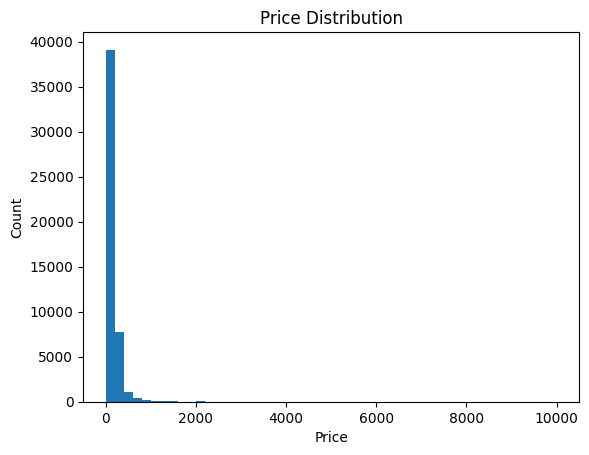

In [ ]:
plt.figure()
plt.hist(df['price'], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


Room Type vs Price

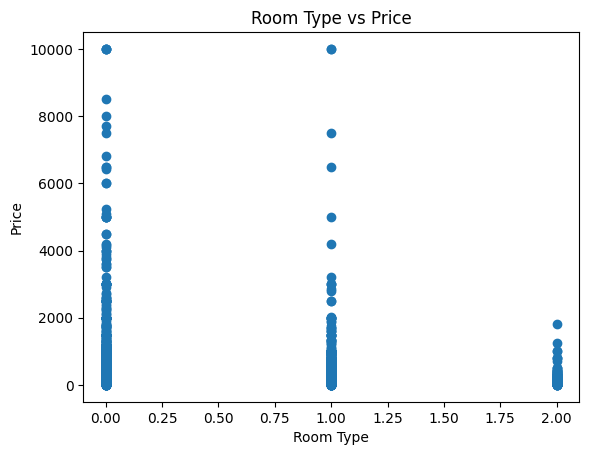

In [ ]:
plt.figure()
plt.scatter(df['room_type'], df['price'])
plt.title("Room Type vs Price")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()


Correlation Heatmap

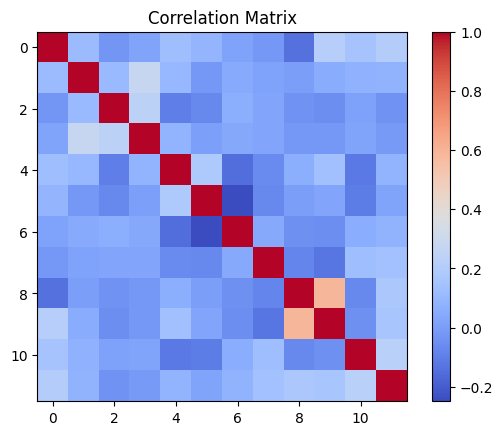

In [ ]:
plt.figure()
plt.imshow(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()


**Preparing Data For Modeling**

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Neural Network Regression Model**

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(64,32),
                        activation='relu',
                        solver='adam',
                        max_iter=200)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

print("Neural Network Results")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2 Score:", r2_score(y_test, y_pred_nn))


Neural Network Results
MAE: 68.8893405554527
MSE: 37292.026171427766
RMSE: 193.11143459522992
R2 Score: 0.15701827355274434


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Classical Model 1 - Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results
MAE: 71.97981544193148
MSE: 39363.63598145803
RMSE: 198.40271162828907
R2 Score: 0.11018978517411138


**Classical Model 2 - Randon Forest**

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results
MAE: 62.59995722125644
MSE: 37885.08225982349
RMSE: 194.6409059263327
R2 Score: 0.14361231263826546


**Hyperparameter Tuning (Randon Forest)**

In [ ]:
params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20]
}

grid = GridSearchCV(RandomForestRegressor(), params, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best CV Score: 0.14868028050306425


**Feature Selection**

In [ ]:
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(X, y)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_new, y, test_size=0.2, random_state=42)


**Final Models with Selected Features**

**Linear Regression**

In [ ]:
lr.fit(X_train_fs, y_train_fs)
pred1 = lr.predict(X_test_fs)

print("Final Linear Regression R2:", r2_score(y_test_fs, pred1))


Final Linear Regression R2: 0.10624548216125607


**Random forest**

In [ ]:
rf.fit(X_train_fs, y_train_fs)
pred2 = rf.predict(X_test_fs)

print("Final Random Forest R2:", r2_score(y_test_fs, pred2))


Final Random Forest R2: -0.012570278023326109


**Final comparision table code**

In [ ]:
print("FINAL COMPARISON")

print("Linear Regression RMSE:",
      np.sqrt(mean_squared_error(y_test_fs, pred1)))

print("Random Forest RMSE:",
      np.sqrt(mean_squared_error(y_test_fs, pred2)))


FINAL COMPARISON
Linear Regression RMSE: 198.84195984888154
Random Forest RMSE: 211.6466982106742
